# import and process the data

In [1]:
from core.loader import DataLoader
from core.embeder import DataEmbeder
from core.utils import display_graphs, display_most_common_words, display_most_common_words_by_class
from core.classifier import SVMClassifier, BERTClassifier
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

/Users/nguyenduyanh/miniforge3/envs/sample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nguyenduyanh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nguyenduyanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nguyenduyanh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
RAW_DATA = "./data/spam_ham_dataset.csv"

In [3]:

dl = DataLoader(data_path=RAW_DATA)
data = dl.load_data()

# Take a look at the some samples in the dataset

In [4]:
data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


# perform some basic analysis about the data 

In [5]:
analysis = dl.basic_analysis()

In [6]:
analysis

{'shape': (5171, 4),
 'missing': False,
 'duplicates': 0,
 'balance': True,
 'class_distribution': {'ham': 3672, 'spam': 1499}}

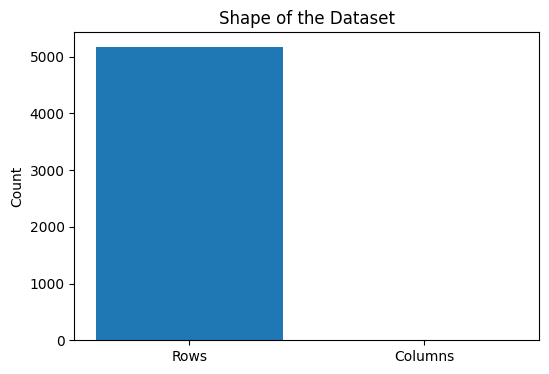

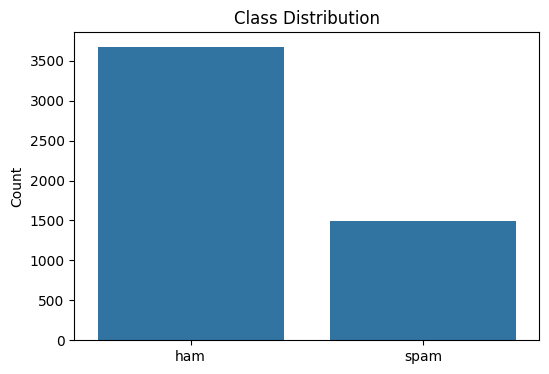

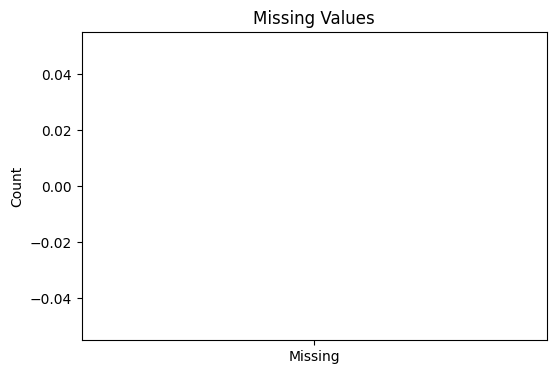

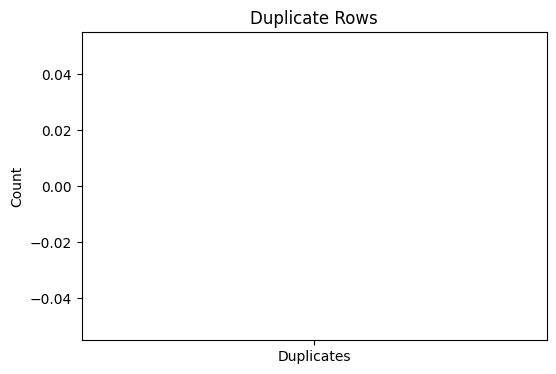

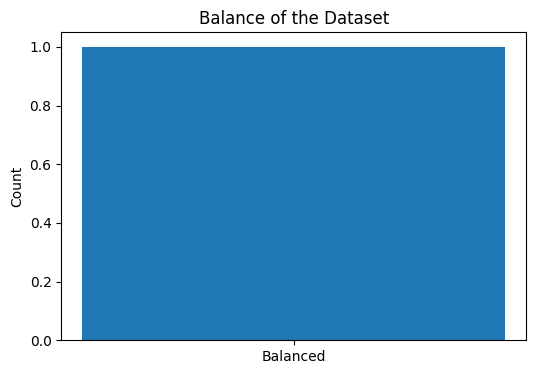

In [7]:
display_graphs(analysis)

# get the top 50 common words in the dataset

In [8]:
word_freq = dl.get_word_frequency()
len(word_freq)

50524

/Users/nguyenduyanh/Desktop/spamham/core/utils.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


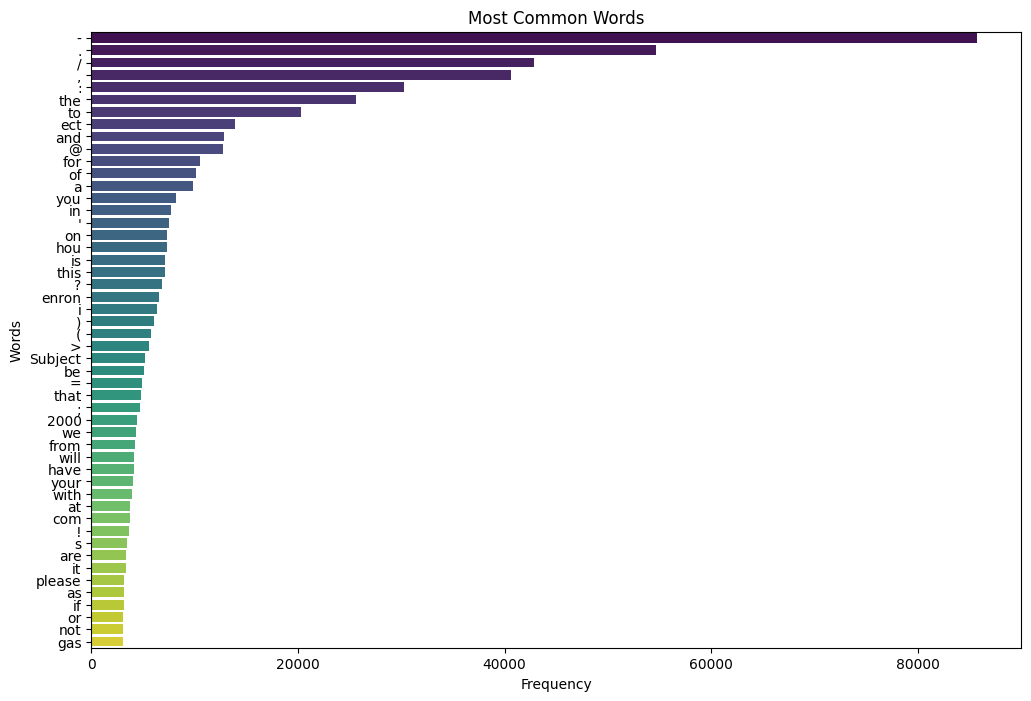

In [9]:
top50 = word_freq.most_common(50)
display_most_common_words(top50)

## now all the words seems to be the stop words and special characters, we will process to remove them

In [10]:
cleaned_data = dl.preprocess_text()

In [11]:
word_freq = dl.get_word_frequency()

/Users/nguyenduyanh/Desktop/spamham/core/utils.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


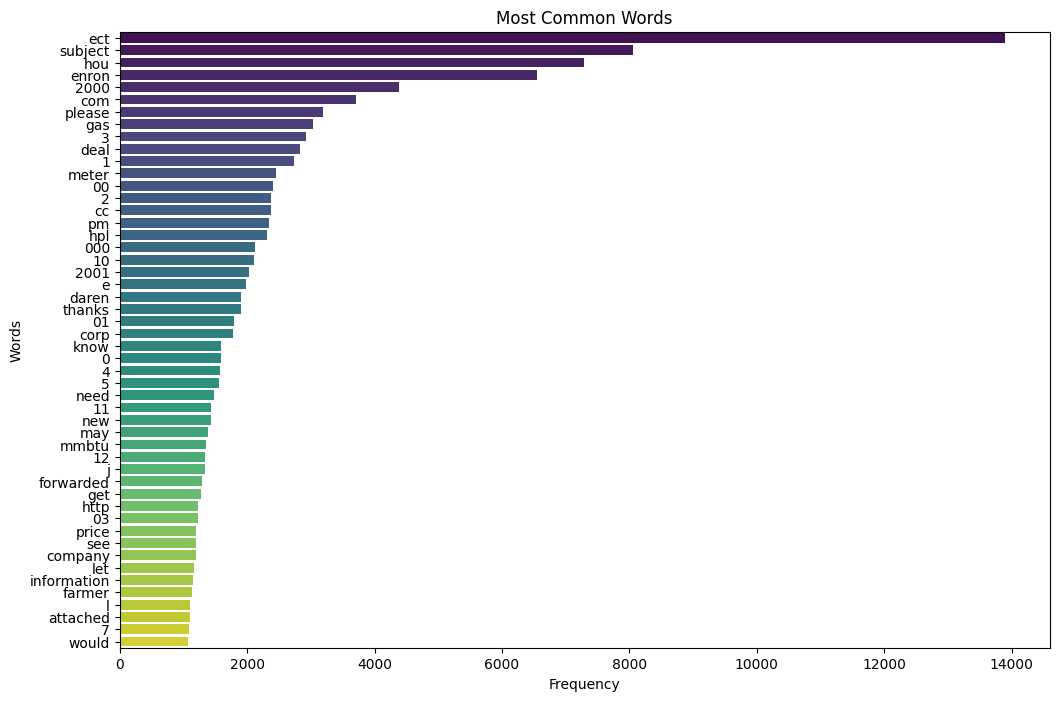

In [12]:
top50 = word_freq.most_common(50)
display_most_common_words(top50)

## now we will take a look at top 50 words for each class: spam/ham

In [13]:
word_freq_by_class = dl.get_word_frequency_by_class()

/Users/nguyenduyanh/Desktop/spamham/core/utils.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


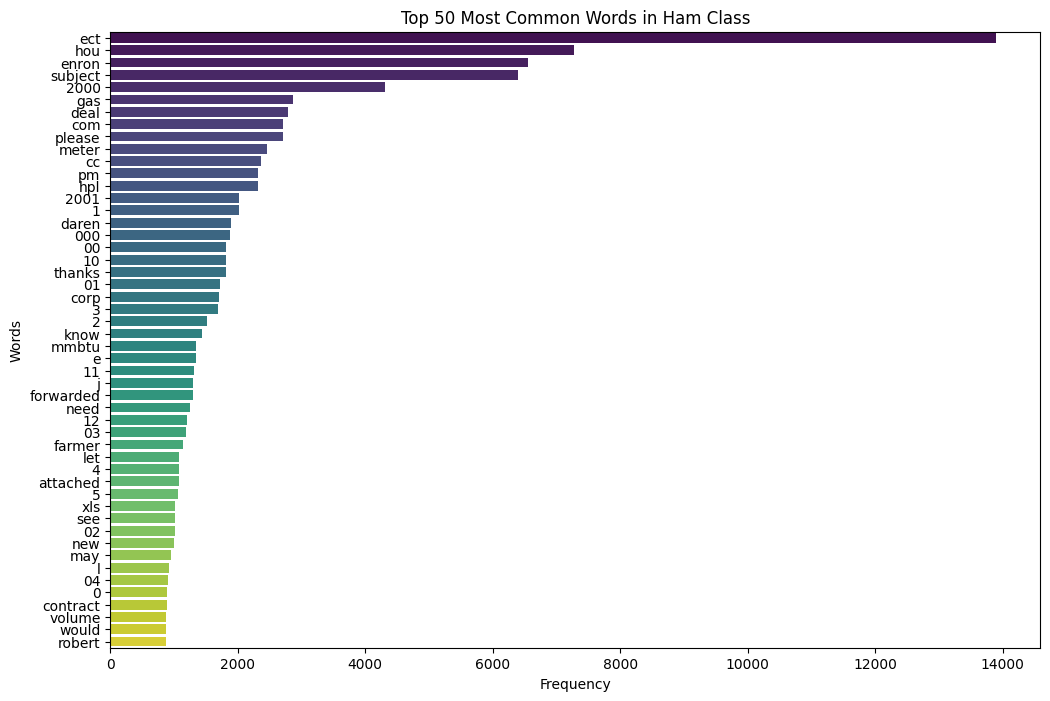

/Users/nguyenduyanh/Desktop/spamham/core/utils.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


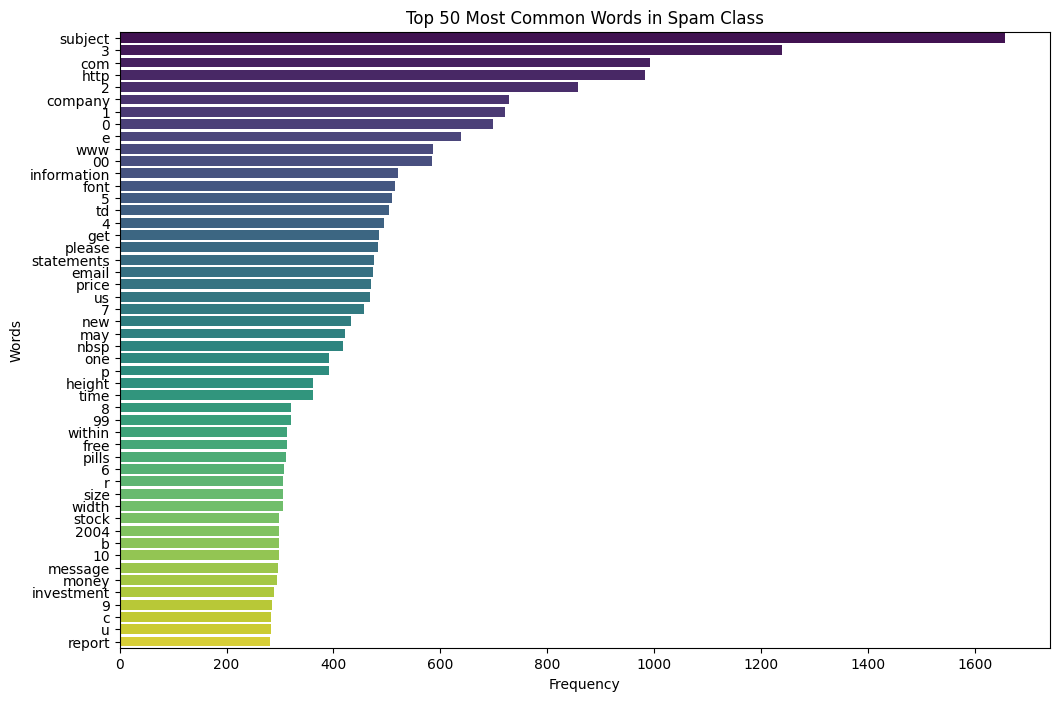

In [14]:
display_most_common_words_by_class(word_freq_by_class)

## the non-spam emails have a lot of important words: hou, gas, contract, volume while in spam we can see a lot of typical words: free, money, investment, com, http, www 

# now we will embed the text with tfidf and pre-trained global vector(glove); due to the limitation of my personal computer i will leave deep learning based methods for further experiments 

In [15]:
data_embeder = DataEmbeder(text_data=cleaned_data['text'])

## The number of cluster is 2, because i want to see the distribution of data regarding to two class (spam/ham); there are methods for choosing optimized number of clusters such as the elbow method but this is my intension so i fix the number of cluster is 2

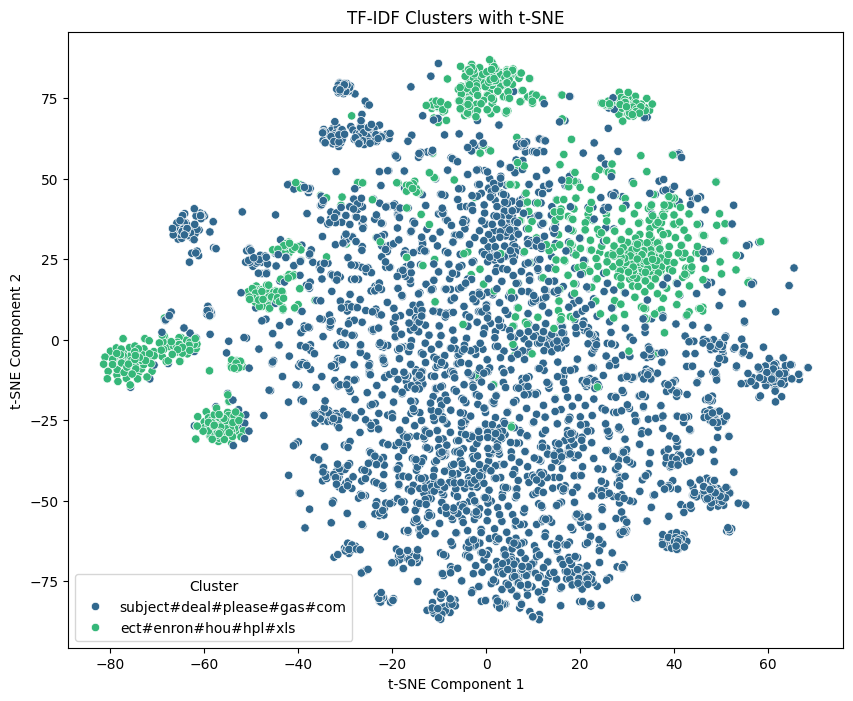

In [16]:
data_embeder.display_tfidf_clusters_tsne(num_clusters=2)

In [17]:
data_embeder.get_top_words_tfidf(top_n=10)

[('ect', 262.87168933277883),
 ('enron', 186.69548377906418),
 ('subject', 183.57291989323662),
 ('hpl', 149.21146545231585),
 ('2000', 148.2121792582825),
 ('hou', 142.26058374624014),
 ('xls', 123.04112417255699),
 ('000', 121.87553610745476),
 ('deal', 115.50631206038193),
 ('gas', 104.8488878287689)]

## now we take a look at the cluster with glove embedding

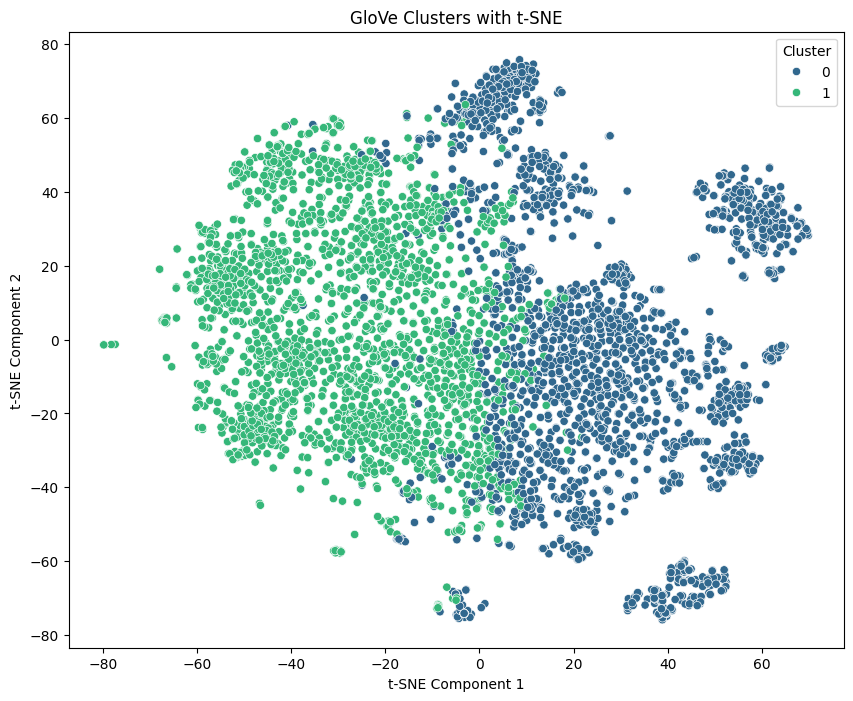

In [18]:
data_embeder.display_glove_clusters_tsne(num_clusters=2)

## interestingly the tf-idf embedding give a good separations for the data, the pre-trained gloved is also good but if we take a closer look at the middle zones of the cluster the distances of the elements are closed, this might cause trouble for the linear classifier such as regression or svm 

In [19]:
X, _ = data_embeder.tfidf()
y = cleaned_data['label']
svm_cls = SVMClassifier(kernel='linear')
X_train, X_test, y_train, y_test = svm_cls.prepare_data(X, y, test_size=0.3)
svm_cls.train(X_train, y_train)
y_test_pred = svm_cls.predict(X_test)
tfidf_acc, tfidf_report = svm_cls.evaluate(y_test, y_test_pred)

In [20]:
tfidf_acc

0.9890463917525774

In [21]:
print(tfidf_report)

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1121
        spam       0.97      0.99      0.98       431

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.99      1552
weighted avg       0.99      0.99      0.99      1552



## we have a very good performance wit tf-idf and svm

## now we can try with glove embeddings

In [22]:
X = data_embeder.glove()

In [23]:
svm_cls = SVMClassifier(kernel='linear')
X_train, X_test, y_train, y_test = svm_cls.prepare_data(X, y, test_size=0.3)
svm_cls.train(X_train, y_train)
y_test_pred = svm_cls.predict(X_test)
glove_acc, glove_report = svm_cls.evaluate(y_test, y_test_pred)

In [24]:
glove_acc

0.9587628865979382

In [25]:
print(glove_report)

              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      1121
        spam       0.92      0.93      0.93       431

    accuracy                           0.96      1552
   macro avg       0.95      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552



## not surprising that glove and linear SMV is not good as tf-idf because as the cluster indicates we have a middle zone that can cause trouble for linear classier; also the pre-trained knowledge will have impact if we can have strong model for example deep learning to learn more represented features 

## let try again with a non-linear kernel 

In [26]:
svm_cls = SVMClassifier(kernel='poly')
X_train, X_test, y_train, y_test = svm_cls.prepare_data(X, y, test_size=0.3)
svm_cls.train(X_train, y_train)
y_test_pred = svm_cls.predict(X_test)
glove_acc, glove_report = svm_cls.evaluate(y_test, y_test_pred)

In [27]:
glove_acc

0.9619845360824743

In [28]:
print(glove_report)

              precision    recall  f1-score   support

         ham       0.98      0.97      0.97      1121
        spam       0.92      0.94      0.93       431

    accuracy                           0.96      1552
   macro avg       0.95      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552



## the accuracy is not improved, it signaled that we might need a better classifier 

In [29]:
# i leave this for further experiment because it is quite slow on my computer 
# bert_cls = BERTClassifier()
# bert_cls.load_data(cleaned_data['text'], cleaned_data['label'])
# bert_cls.create_dataloaders()
# bert_cls.train()

## we will remove top 200 common words to see if it has negative impacts on the classifier 

In [30]:
data_wo_common_words = dl.remove_common_words(top_n=200)

In [31]:
data_embeder = DataEmbeder(text_data=data_wo_common_words['text'])

In [32]:
X, _ = data_embeder.tfidf()
y = cleaned_data['label']
svm_cls = SVMClassifier(kernel='linear')
X_train, X_test, y_train, y_test = svm_cls.prepare_data(X, y, test_size=0.3)
svm_cls.train(X_train, y_train)
y_test_pred = svm_cls.predict(X_test)
tfidf_acc, tfidf_report = svm_cls.evaluate(y_test, y_test_pred)

In [33]:
tfidf_acc

0.9877577319587629

In [34]:
print(tfidf_report)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1121
        spam       0.97      0.99      0.98       431

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.98      1552
weighted avg       0.99      0.99      0.99      1552



In [35]:
X = data_embeder.glove()

In [36]:
svm_cls = SVMClassifier(kernel='linear')
X_train, X_test, y_train, y_test = svm_cls.prepare_data(X, y, test_size=0.3)
svm_cls.train(X_train, y_train)
y_test_pred = svm_cls.predict(X_test)
glove_acc, glove_report = svm_cls.evaluate(y_test, y_test_pred)

In [37]:
glove_acc

0.9329896907216495

In [38]:
print(glove_report)

              precision    recall  f1-score   support

         ham       0.96      0.95      0.95      1121
        spam       0.87      0.89      0.88       431

    accuracy                           0.93      1552
   macro avg       0.91      0.92      0.92      1552
weighted avg       0.93      0.93      0.93      1552



## we got a decay in the performance of the two type of embeddings but the glove embedding seems to be suffers more 